```json
[
  {"box_2d": [474, 30, 960, 488], "mask": "", "label": "red triangle"}
]
```

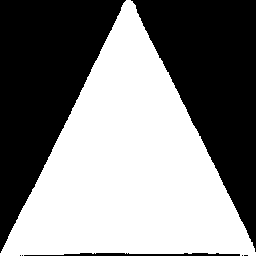

In [24]:
from PIL import Image
from io import BytesIO
from google import genai
from google.genai import types
from PIL import Image

import io
import os
import requests
from io import BytesIO


import os

GOOGLE_API_KEY=os.environ.get('GEMINI_API_KEY')
client = genai.Client(api_key=GOOGLE_API_KEY)



image = "image_1.png" # @param ["Socks.jpg","Vegetables.jpg","Japanese_bento.png","Cupcakes.jpg","Origamis.jpg","Fruits.jpg","Cat.jpg","Pumpkins.jpg","Breakfast.jpg","Bookshelf.jpg", "Spill.jpg"] {"allow-input":true}
prompt = "Give the segmentation masks for the triangle. Output a JSON list of segmentation masks where each entry contains the 2D bounding box in the key \"box_2d\", the segmentation mask in key \"mask\", and the text label in the key \"label\". Use descriptive labels. Always generate the full mask, not just <start_of_mask>."  # @param {type:"string"}

# Load and resize image
im = Image.open("notebooks/oracle_verification/.debug/oracle/image_1.png")

# Run model to find segmentation masks
response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents=[prompt, im],
    config = types.GenerateContentConfig(
        temperature=0.5,
        thinking_config=types.ThinkingConfig(
          thinking_budget=0
        ),    )
)

# Check output
print(response.text)

In [27]:
response.usage_metadata

GenerateContentResponseUsageMetadata(
  candidates_token_count=64,
  prompt_token_count=326,
  prompt_tokens_details=[
    ModalityTokenCount(
      modality=<MediaModality.TEXT: 'TEXT'>,
      token_count=68
    ),
    ModalityTokenCount(
      modality=<MediaModality.IMAGE: 'IMAGE'>,
      token_count=258
    ),
  ],
  total_token_count=390
)

In [28]:
import json

res_meta = response.usage_metadata
json.dumps(
    {
        "completion_token": res_meta.candidates_token_count,
        "prompt_token": res_meta.prompt_token_count,
        "total_tokens": res_meta.total_token_count,
    }
)

'{"completion_token": 64, "prompt_token": 326, "total_tokens": 390}'